In [4]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
from sklearn import linear_model as lm
from IPython.display import display, HTML, Markdown, display #display settings
import warnings

#constants
%matplotlib inline
sns.set_style("dark")
#to ignore warnings in output
warnings.filterwarnings('ignore')
#global information settings
sigLev = 2 #three significant digits
percentMul = 100 #for percentage multiplication
figWidth = 8 #for figure width
figHeight = 6 #for figure height

In [6]:
#load in datsaet
purchaseFrame = pd.read_csv("../data/raw/transaction_data_8451.csv")

# TDSC Episode II: Exploratory Data Analysis

_By Michael Rosenberg, [mmrosenb@andrew.cmu.edu](mailto:mmrosenb@andrew.cmu.edu)_

_Last Updated: 9/7/2016 10:04 PM CST_

## Univariate Analysis

Let us start by analyzing our data from a univariate perspective.

In [7]:
#number of households in dataset
numHouseholds = purchaseFrame["household_key"].nunique()

We see that the number of households featured in our dataset is {{numHouseholds}}. Given that we have {{purchaseFrame.shape[0]}} transactions in our dataset, this suggests that our datset is a very large number of transactions only over a limited number of households. Thus, it may be difficult to perform strong generalizations about this data at the household level due to the limited number of household observations.

In [8]:
#get number of baskets in dataset
numBaskets = purchaseFrame["BASKET_ID"].nunique()

We see that the number of baskets within this dataset is {{numBaskets}}. This suggests that the average number of transaction per basket is {{np.round(float(purchaseFrame.shape[0]) / numBaskets,1)}}, or about 10 transactions per basket. This suggests that on average, trips to the grocery store tend to lie around 10 items.

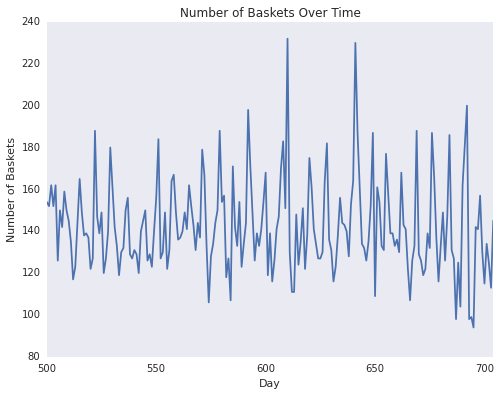

In [9]:
#study purchases over time
dayFrame = purchaseFrame.groupby("DAY")["BASKET_ID"].nunique()
#then plot
plt.figure(figsize=(figWidth,figHeight))
dayFrame.plot()
plt.xlabel("Day")
plt.ylabel("Number of Baskets")
plt.title("Number of Baskets Over Time")

_Figure 1: Number of baskets over time._

We see that the volatility of the number of baskets seems to be higher after day $575$ than before. It is difficult to say why this is since we don't have a strong measure of real season effects encoded in the ``Day`` variable.

In [10]:
#get number of unique products within the dataset
numProducts = purchaseFrame["PRODUCT_ID"].nunique()

We see that the number of products featured in this dataset is {{numProducts}}. Let us see the distribution of these products in our dataset.

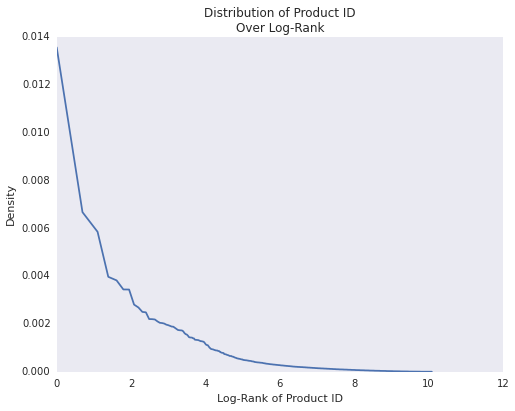

In [11]:
#group by product_id
productFrame = purchaseFrame.groupby("PRODUCT_ID",as_index = False)[
                                                    "household_key"].count()
#rename
productFrame = productFrame.rename(columns={"household_key":"frequency"})
#order by density
productFrame["density"] = productFrame["frequency"] / productFrame[
                                                        "frequency"].sum()
#order by density
productFrame = productFrame.sort_values("density",ascending = False)
#then build log-rank density
productFrame["rank"] = range(1,productFrame.shape[0]+1)
productFrame["logRank"] = np.log(productFrame["rank"])
plt.figure(figsize=(figWidth,figHeight))
plt.plot(productFrame["logRank"],productFrame["density"])
plt.xlabel("Log-Rank of Product ID")
plt.ylabel("Density")
plt.title("Distribution of Product ID\nOver Log-Rank")

_Figure 2: LogRank Density plot of Product ID._

We see that the distribution of Product IDs is very sparse, as the most frequent product ID seems to only contain about $1.4\%$ of the dataset.

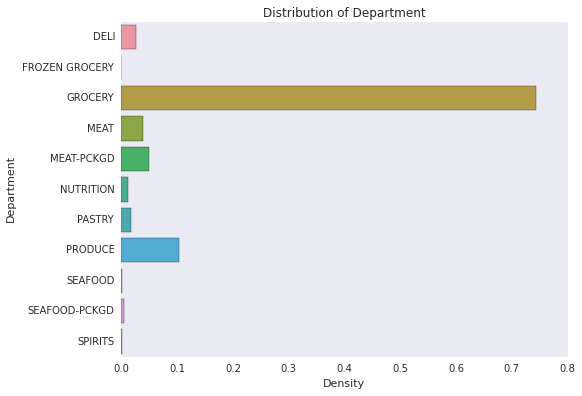

In [12]:
departmentFrame = purchaseFrame.groupby("DEPARTMENT",as_index = False)[
                                            "household_key"].count()
departmentFrame = departmentFrame.rename(columns={"household_key":"count"})
departmentFrame["density"] = (departmentFrame["count"] / departmentFrame[
                                                            "count"].sum())
#make distribution of department
plt.figure(figsize=(figWidth,figHeight))
deptBarPlot = sns.barplot(x = "density",y = "DEPARTMENT",data = departmentFrame,
                          orient = "h")
deptBarPlot.set_xlabel("Density")
deptBarPlot.set_ylabel("Department")
deptBarPlot.set_title("Distribution of Department")

_Figure 3: Distribution of department over transactions._

We see that groceries take an abundance of the transactional observations in our dataset, although produce and meat goods take a substantial amount of observations.